In [197]:
%reload_ext autoreload
%autoreload 2

from src.db import DB
import pandas as pd

In [176]:
DB().picklize()

In [192]:

db = DB().load()
db

date        code   
1999-12-28  A000010     3700.0
            A000020     2710.0
            A000030     3840.0
            A000040    97024.0
            A000050     1802.0
                        ...   
2026-01-30  A900270      176.0
            A900290     3485.0
            A900300      133.0
            A900310      563.0
            A900340      750.0
Name: adjclose, Length: 12046989, dtype: float64

In [193]:
db.unstack()

code,A000010,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000110,...,A217590,A0007C0,A478340,A476830,A0013V0,A491000,A490470,A0004V0,A493330,A0001A0
date,,,,,,,,,,,,,,,,,,,,,
1999-12-28,3700.0,2710.0,3840.0,97024.0,1802.0,836.0,7752.0,3930.0,2611.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4050.0,3116.0,4150.0,111028.0,1694.0,878.0,8153.0,4515.0,2824.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,3925.0,3305.0,3950.0,127032.0,1651.0,1009.0,8153.0,4190.0,2772.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,3600.0,2871.0,3500.0,136034.0,1723.0,977.0,8086.0,4200.0,2590.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-07,3800.0,3296.0,3600.0,122030.0,1644.0,982.0,8487.0,4000.0,2711.0,2645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026-01-26,NaN,6160.0,NaN,452.0,8600.0,NaN,60300.0,17970.0,109000.0,NaN,...,14770.0,35800.0,47100.0,157600.0,8470.0,80800.0,26100.0,15490.0,17140.0,NaN
2026-01-27,NaN,6140.0,NaN,449.0,8780.0,NaN,62100.0,18010.0,108300.0,NaN,...,15680.0,34700.0,48850.0,157700.0,8500.0,82500.0,28400.0,20100.0,19580.0,NaN
2026-01-28,NaN,6110.0,NaN,444.0,8840.0,NaN,61000.0,17880.0,109700.0,NaN,...,15260.0,42200.0,49100.0,159500.0,8740.0,80300.0,29100.0,20250.0,19490.0,NaN


In [201]:
from src.backtest import backtest
from src.pattern import all as all_pattern

result, rtns = backtest(all_pattern, start_date="2000-01-01", end_date="2025-12-31")
result

codes:   0%|          | 0/3529 [00:00<?, ?code/s]

,count,arith_mean,geom_mean,rise_prob
period,,,,
1D,11990609,0.006043,-0.000403,0.433789
1W,11986499,0.020619,-0.001895,0.452168
2W,11981351,0.025513,-0.003295,0.454054
3W,11976200,0.028280,-0.004410,0.454141
6W,11937501,0.036487,-0.007571,0.451961
3M,11829762,0.049778,-0.014296,0.448892
6M,11615790,0.078321,-0.025651,0.444345


<Axes: xlabel='period'>

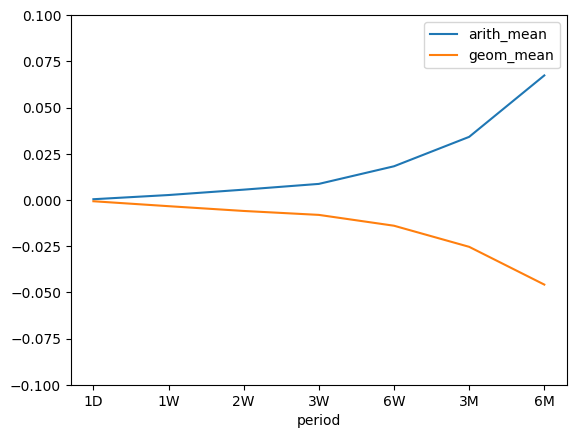

In [ ]:
result[['arith_mean', 'geom_mean']].plot(ylim=(-0.1, 0.1))

<Axes: xlabel='period'>

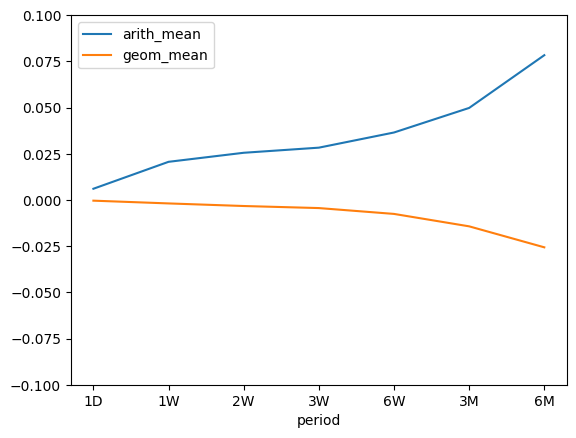

In [202]:
result[['arith_mean', 'geom_mean']].plot(ylim=(-0.1, 0.1))

<Axes: xlabel='period'>

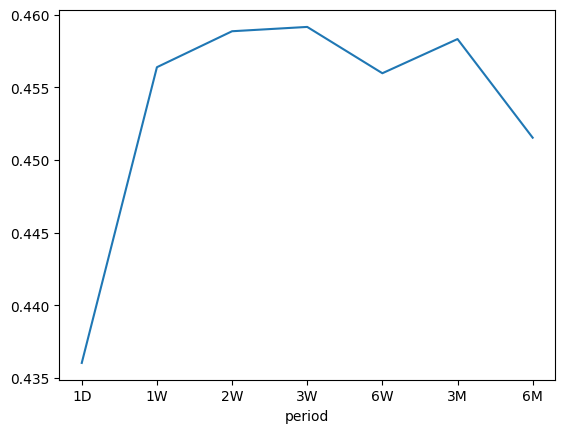

In [200]:
result.rise_prob.plot()

<Axes: xlabel='period'>

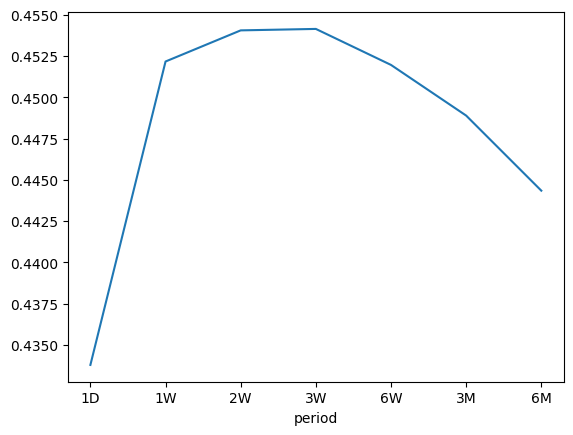

In [203]:
result.rise_prob.plot()